In [115]:
# System and file libraries
import os, sys, random, codecs
import pickle, datetime, logging

# Data parsing and wrangling libraries
import pandas as pd
import numpy as np

# NLP processing libraries
import re
import ftfy
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer

import gensim
from gensim import corpora

# Visualisation libraries
#import seaborn as sns
import matplotlib.pyplot as plt

# Modelling library
from gensim.models.ldamodel import LdaModel
from gensim.models.ldamulticore import LdaMulticore

# Visualizing the model
from __future__ import print_function
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evelynjohnson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [184]:
class TopicModel():
    def __init__(self, df):
        self.df = df
    
    def clean_text(self, s):
        ftfy.fix_text('âœ” No problems')
        # remove text inside brackets
        s = re.sub(r'(?<=\[)[^][]*(?=])', "", s)

        s = s.replace('\n', "").replace('-', ' ').replace('(', ' ').replace('§', '')
        s = s.translate(str.maketrans('', '', string.punctuation))
        s = re.sub(r"\b[0-9]+\b\s*", "", s)
        s = s.lower()
        return s


    def lemmatize_and_eliminate(self, text):
        stemmer = WordNetLemmatizer()
        stop_words = stopwords.words('english')
        stop_cont = 'petitioner trial federal claim law may act decision action may respondent jury whether right united would'
        stop_words.extend(stop_cont.split())
        text = [word for word in text.split() if word not in stop_words]
#         texts_out = []
#         for sent in texts:
#             doc = nlp(" ".join(sent)) 
#             texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#         return texts_out
        lemmatized = [stemmer.lemmatize(word) for word in text]
        lem_and_reduced = ' '.join([s for s in lemmatized if len(s) > 2])
        
        return lem_and_reduced
    
#     def make_bigrams(self, text):
#         bigram = gensim.models.Phrases(text, min_count=5, threshold=100) # higher threshold fewer phrases.


#         # Faster way to get a sentence clubbed as a trigram/bigram
#         bigram_mod = gensim.models.phrases.Phraser(bigram)
#         return [bigram_mod[doc] for doc in texts]

        
    def create_trigrams(self, text):
        trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
        trigram_mod = gensim.models.phrases.Phraser(trigram)
        return [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        """https://spacy.io/api/annotation"""
        texts_out = []
        for sent in texts:
            doc = nlp(" ".join(sent)) 
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        return texts_out

    def preprocess(self):
        self.df['clean_text'] = self.df['Raw Text'].map(lambda x: self.clean_text(x))
        #self.df['bigram_texts'] = self.df['Raw Text'].map(lambda x: self.make_bigrams(x))
        self.df['preprocessed'] = self.df['clean_text'].map(lambda x: self.lemmatize_and_eliminate(x))
        return self.df.preprocessed

    
    def create_dictionary(self, processed_text):
        dictionary = corpora.Dictionary(docs)
        dictionary.filter_extremes(no_below=4, no_above=0.7)

        return dictionary

    def lda_model(self, doc_term_matrix, dictionary, docs, topics):
        #Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above
        

        #Creating the object for LDA model using gensim library & Training LDA model on the document term matrix.
        ldamodel = LdaModel(corpus=doc_term_matrix, 
                            id2word=dictionary, 
                            num_topics=topics,
                            random_state=100,
                           update_every=1,
                           chunksize=100,
                           passes=10,
                           alpha='auto',
                           per_word_topics=True)

        #Saving LDA into a file
        # ldafile = open('lda_model.pkl','wb')
        # pickle.dump(ldamodel,ldafile)
        # ldafile.close()

        return ldamodel

In [154]:
from gensim.models import Phrases

from gensim.models.phrases import Phraser

documents = ["the mayor of new york was there", "machine learning can be useful sometimes","new york mayor was present"]

sentence_stream = [doc.split(" ") for doc in documents]
print(sentence_stream)

#bigram = Phrases(sentence_stream, min_count=1, threshold=2, delimiter=b' ')
bigram = Phrases(sentence_stream, min_count=1, threshold=2)

bigram_phraser = Phraser(bigram)


print(bigram_phraser)

for sent in sentence_stream:
    tokens_ = bigram_phraser[sent]

    print(tokens_)

[['the', 'mayor', 'of', 'new', 'york', 'was', 'there'], ['machine', 'learning', 'can', 'be', 'useful', 'sometimes'], ['new', 'york', 'mayor', 'was', 'present']]
FrozenPhrases<1 phrases, min_count=1, threshold=2>
['the', 'mayor', 'of', 'new_york', 'was', 'there']
['machine', 'learning', 'can', 'be', 'useful', 'sometimes']
['new_york', 'mayor', 'was', 'present']


In [21]:
def get_dfs():
    dfs = ['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10', 'df11']
    num =1 
    for i, df in enumerate(dfs):
        path = '/Users/evelynjohnson/Desktop/METIS/Engineering/Project/df' + str(num) + '.csv'
        dfs[i] = pd.read_csv(path)
        num+=1 
    return dfs

dfs = get_dfs()

In [127]:
tm = TopicModel(dfs[1])
docs = tm.preprocess()
docs

0       alexander virginia judgment supreme court virg...
1       almeida sanchez united state petitioner mexica...
2       almota farmer elevator whse last several succe...
3       alo petition writ certiorari united state cour...
4       american trial lawyer supreme court abstaining...
                              ...                        
1093    whalen roe responding concern drug diverted un...
1094    wise lipscomb injunction denied nov see justic...
1095    wolman walter appellant citizen taxpayer ohio ...
1096    wooley maynard new hampshire statute require n...
1097    zacchini scripps howard broadcasting petitione...
Name: preprocessed, Length: 1098, dtype: object

In [185]:
ldamodels = []
for df in dfs:
    start=datetime.datetime.now()
    tm = TopicModel(df)
    processed_text = tm.preprocess()
    docs = processed_text.map(lambda doc: doc.split())
    dictionary = tm.create_dictionary(docs)
    corpus = [dictionary.doc2bow(doc) for doc in docs]
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in docs]
    ldamodel = tm.lda_model(doc_term_matrix, dictionary, docs, 8)
    
    time=datetime.datetime.now()-start
    print('Total Time Elapsed:', time)
    
    ldamodels.append([ldamodel, corpus, docs, doc_term_matrix, processed_text])
    
    
    

Total Time Elapsed: 0:00:08.815409
Total Time Elapsed: 0:00:07.044562
Total Time Elapsed: 0:00:06.581944
Total Time Elapsed: 0:00:06.000550
Total Time Elapsed: 0:00:04.151684
Total Time Elapsed: 0:00:10.836124
Total Time Elapsed: 0:00:13.934118
Total Time Elapsed: 0:00:15.791108
Total Time Elapsed: 0:00:17.408660
Total Time Elapsed: 0:00:09.319598
Total Time Elapsed: 0:00:13.317299


In [ ]:
stop_cont = 'petitioner trial federal claim law may act decision action may respondent jury whether right united would'

In [197]:
for topic in ldamodels[0][0].print_topics(num_topics=8, num_words=10):
    print(topic[0]+1, " ", topic[1],"\n")

1   0.037*"general" + 0.035*"attorney" + 0.028*"certiorari" + 0.025*"petition" + 0.023*"granted" + 0.019*"justice" + 0.017*"denied" + 0.016*"motion" + 0.016*"writ" + 0.015*"judgment" 

2   0.028*"child" + 0.015*"board" + 0.012*"regulation" + 0.012*"security" + 0.011*"service" + 0.010*"benefit" + 0.009*"family" + 0.009*"exemption" + 0.009*"classification" + 0.008*"program" 

3   0.017*"school" + 0.017*"district" + 0.011*"county" + 0.009*"public" + 0.007*"system" + 0.007*"amendment" + 0.007*"city" + 0.006*"education" + 0.006*"one" + 0.006*"right" 

4   0.010*"commission" + 0.007*"bank" + 0.006*"business" + 0.006*"damage" + 0.006*"corporation" + 0.006*"stock" + 0.005*"agreement" + 0.005*"company" + 0.004*"share" + 0.004*"contract" 

5   0.026*"union" + 0.018*"member" + 0.015*"appellant" + 0.014*"labor" + 0.012*"party" + 0.012*"complaint" + 0.012*"election" + 0.010*"board" + 0.010*"injunction" + 0.010*"national" 

6   0.012*"defendant" + 0.010*"evidence" + 0.008*"criminal" + 0.008*"judge" 

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodels[0][0], corpus=ldamodels[0][1], texts=ldamodels[0][4])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

In [191]:
def get_ldamodel_df(ldamodel, preprocessed_text):
    topics = ldamodel.show_topics(formatted=False)
    data_flat = [w for w_list in preprocessed_text for w in w_list]
    counter = Counter(data_flat)

    out = []
    for i, topic in topics:
        for word, weight in topic:
            out.append([word, i , weight, counter[word]])

    df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count']) 
    
    return df

word_df1 = get_ldamodel_df(ldamodels[0][0], ldamodels[0][4])
word_df2 = get_ldamodel_df(ldamodels[1][0], ldamodels[1][4])
word_df3 = get_ldamodel_df(ldamodels[2][0], ldamodels[2][4])
word_df4 = get_ldamodel_df(ldamodels[3][0], ldamodels[3][4])
word_df5 = get_ldamodel_df(ldamodels[4][0], ldamodels[4][4])
word_df6 = get_ldamodel_df(ldamodels[5][0], ldamodels[5][4])
word_df7 = get_ldamodel_df(ldamodels[6][0], ldamodels[6][4])
word_df8 = get_ldamodel_df(ldamodels[7][0], ldamodels[7][4])
word_df9 = get_ldamodel_df(ldamodels[8][0], ldamodels[8][4])
word_df10 = get_ldamodel_df(ldamodels[9][0], ldamodels[9][4])
word_df11 = get_ldamodel_df(ldamodels[10][0], ldamodels[10][4])

In [195]:
dfs = [word_df1, word_df2, word_df3, word_df4, word_df5, word_df6, word_df7, word_df8, word_df9, word_df10, word_df11]
num =1 
for df in dfs:
    name = 'word_df' + str(num) + '.csv'
    df.to_csv(name, index=False)
    num+=1 

/var/folders/36/bhyjfmcj7yn9swscblnx0c040000gn/T/ipykernel_92388/1579470751.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/36/bhyjfmcj7yn9swscblnx0c040000gn/T/ipykernel_92388/1579470751.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/36/bhyjfmcj7yn9swscblnx0c040000gn/T/ipykernel_92388/1579470751.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/36/bhyjfmcj7yn9swscblnx0c040000gn/T/ipykernel_92388/1579470751.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalig

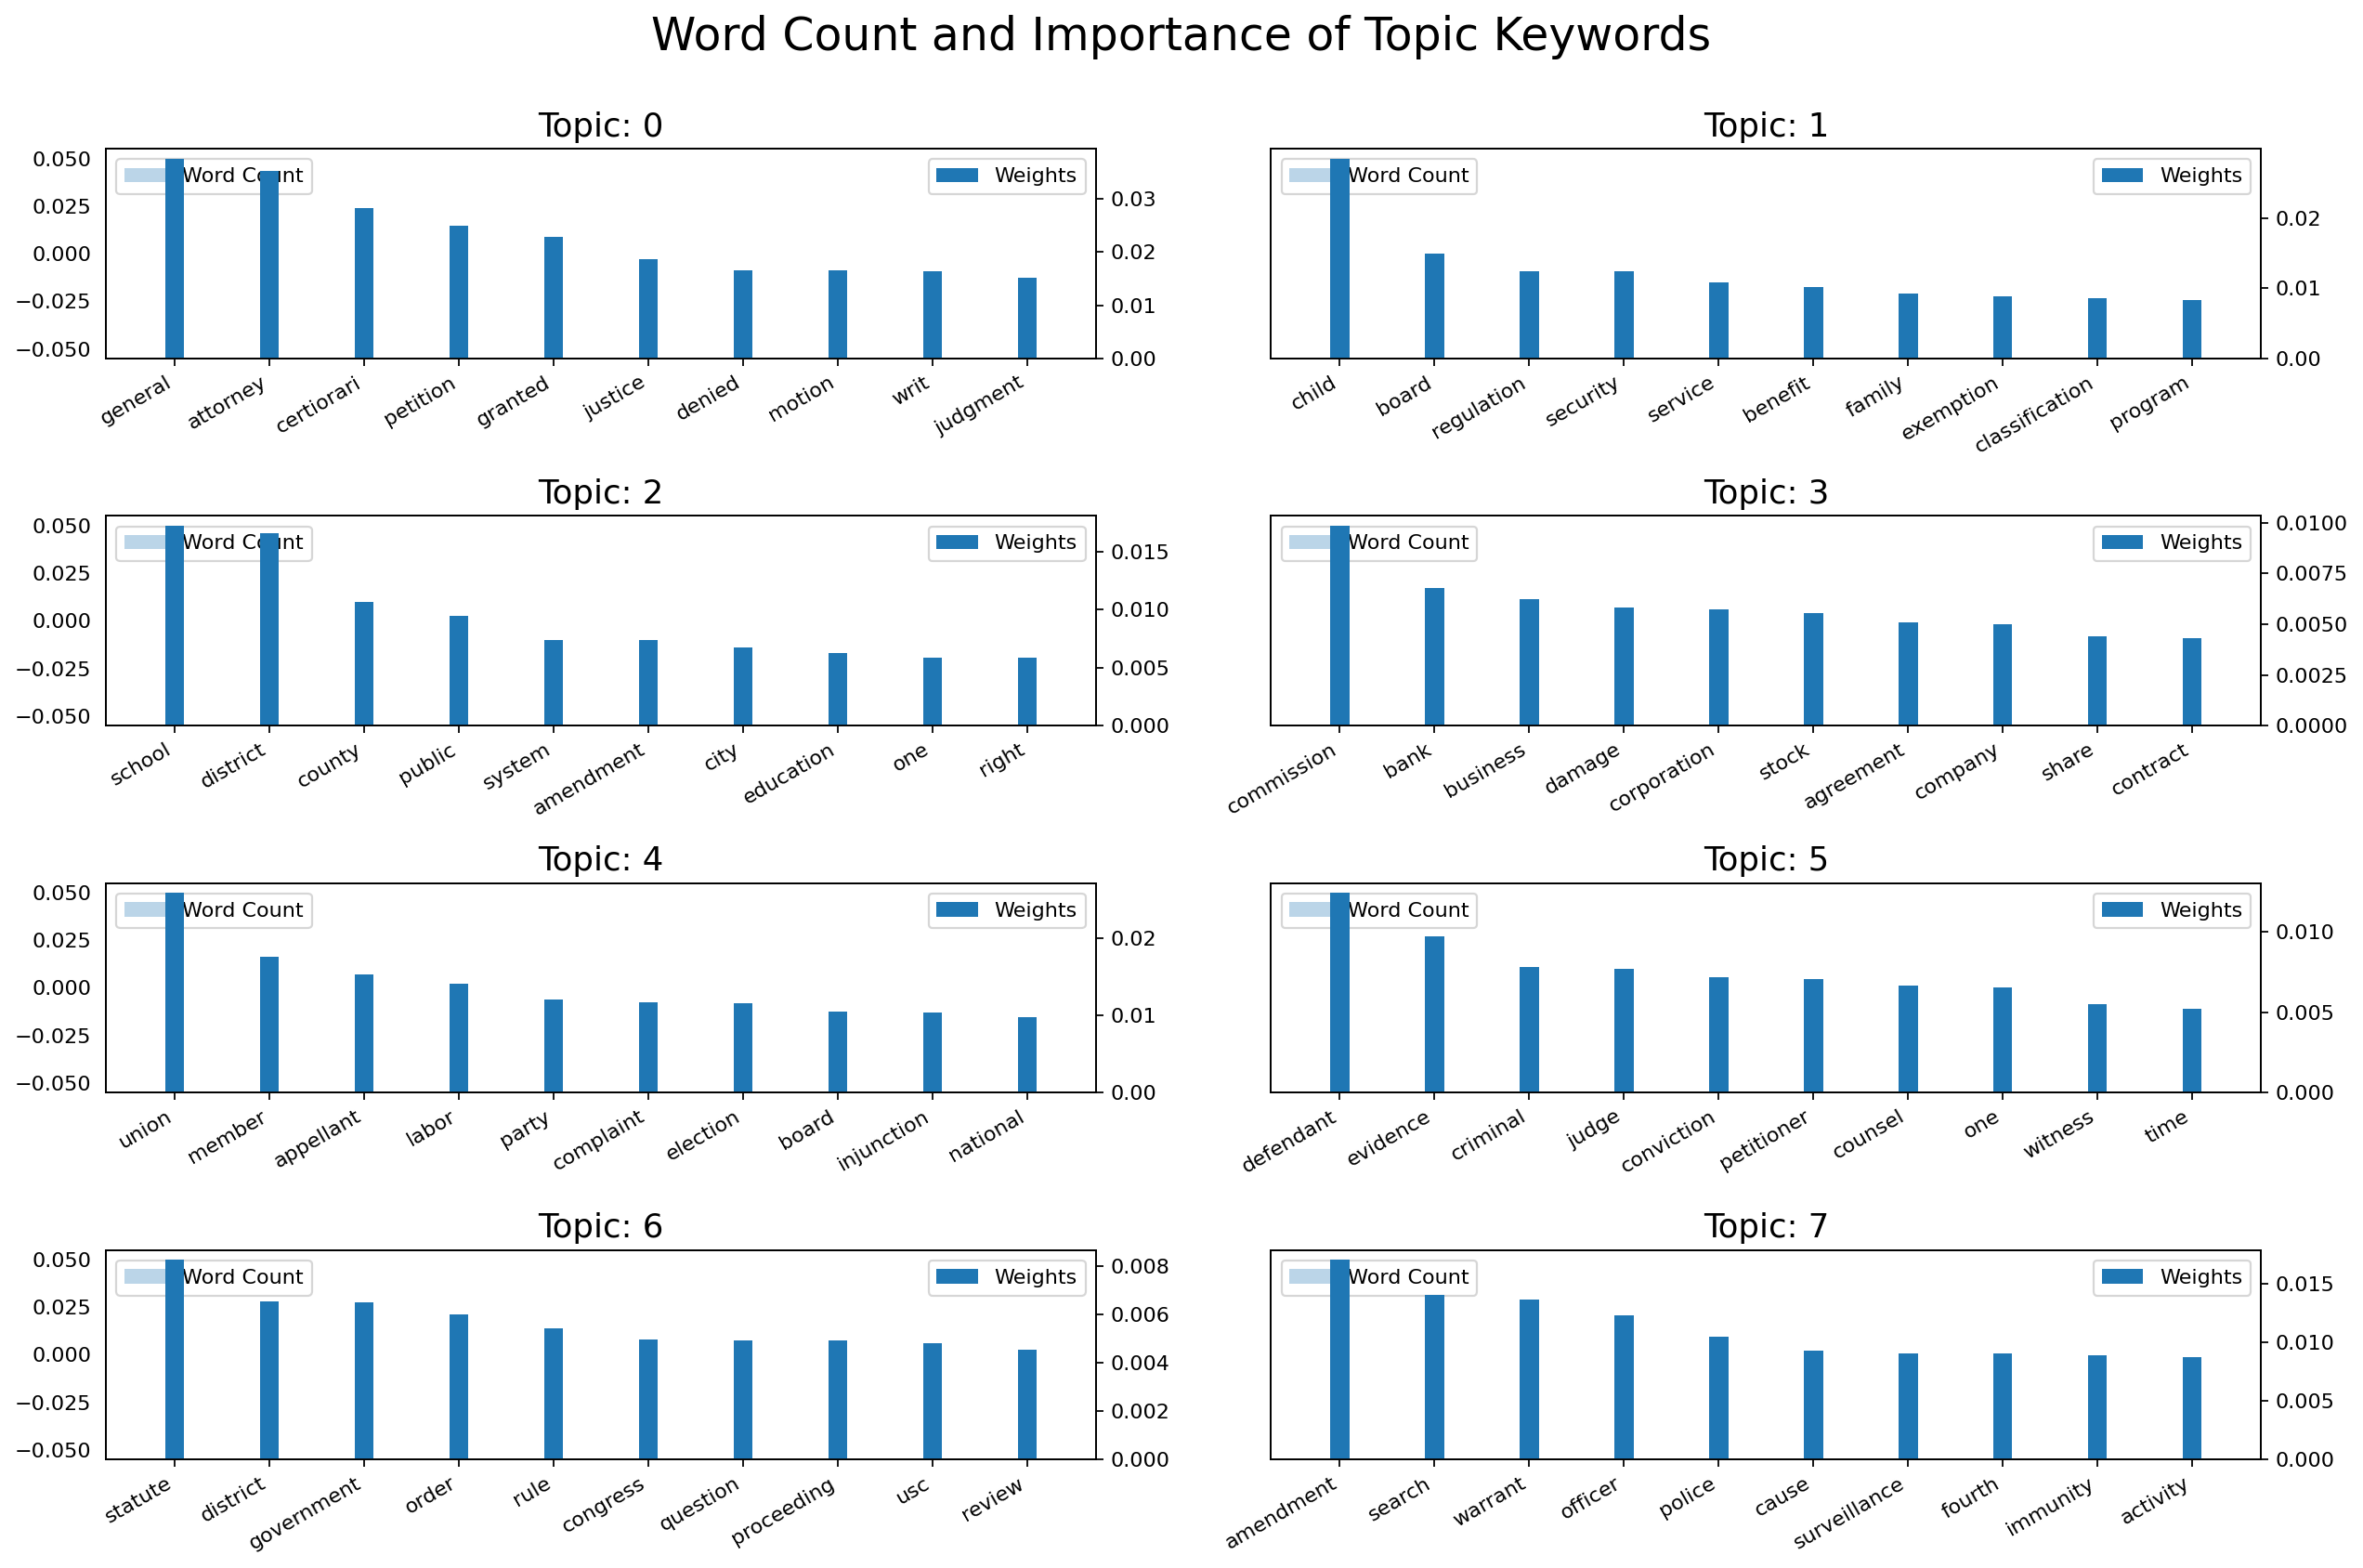

In [203]:
from collections import Counter
import matplotlib.colors as mcolors

def plot_top_words(ldamodel, preprocessed_text):
    topics = ldamodel.show_topics(formatted=False)
    data_flat = [w for w_list in preprocessed_text for w in w_list]
    counter = Counter(data_flat)

    out = []
    for i, topic in topics:
        for word, weight in topic:
            out.append([word, i , weight, counter[word]])

    df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

    # Plot Word Count and Weights of Topic Keywords
    fig, axes = plt.subplots(4, 2, figsize=(16,10), sharey=True, dpi=160)
    for i, ax in enumerate(axes.flatten()):
        ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], width=0.5, alpha=0.3, label='Word Count')
        ax_twin = ax.twinx()
        ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], width=0.2, label='Weights')
        #ax.set_ylabel('Word Count')
        #ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 7500)
        ax.set_title('Topic: ' + str(i), fontsize=16)
        ax.tick_params(axis='y', left=False)
        ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
        ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

    fig.tight_layout(w_pad=2)    
    fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
    plt.show()
    
plot_top_words(ldamodels[0][0], ldamodels[0][4])

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=docs):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=final_model, corpus=corpus, texts=docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)